In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!cp -r "/content/drive/My Drive/Collab Dataset/IMDB Dataset.csv" "/content/"


In [3]:
!ls "/content/drive/My Drive/Collab Dataset/IMDB Dataset.csv"



'/content/drive/My Drive/Collab Dataset/IMDB Dataset.csv'


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('/content/IMDB Dataset.csv')

In [6]:
print(df.head())
print(df.info())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [7]:
if 'sentiment' in df.columns:
    df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
else:
    raise ValueError("Sentiment column is missing in the dataset.")

In [8]:
texts = df['review'].values
labels = df['label'].values

In [9]:
vocab_size = 100000  # Choose vocabulary size
max_length = 100

In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')  # OOV token for words out of vocab
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [11]:
labels = np.array(labels)
embedding_dim = 100
print(f"Padded sequences shape: {padded_sequences.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Vocabulary size: {vocab_size}")




Padded sequences shape: (50000, 100)
Labels shape: (50000,)
Vocabulary size: 100000


In [12]:
from tensorflow.keras.layers import Input
inputs = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)
lstm_layer = LSTM(128)(embedding_layer)
dropout_layer = Dropout(0.5)(lstm_layer)
outputs = Dense(1, activation='sigmoid')(dropout_layer)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 100)            │      10,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,117,377 (38.59 MB)

 Trainable params: 10,117,377 (38.59 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
train_size = int(0.8 * len(texts))
X_train = padded_sequences[:train_size]
X_test = padded_sequences[train_size:]
y_train = labels[:train_size]
y_test = labels[train_size:]

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.7266 - loss: 0.5225 - val_accuracy: 0.8582 - val_loss: 0.3252
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9139 - loss: 0.2371 - val_accuracy: 0.8682 - val_loss: 0.3211
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9511 - loss: 0.1429 - val_accuracy: 0.8550 - val_loss: 0.3651
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9739 - loss: 0.0800 - val_accuracy: 0.8437 - val_loss: 0.4520
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9850 - loss: 0.0498 - val_accuracy: 0.8554 - val_loss: 0.5279
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9893 - loss: 0.0369 - val_accuracy: 0.8413 - val_loss: 0.7284
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9936 - loss: 0.0230 - val_accuracy: 0.8441 - val_loss: 0.7568
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9953 -

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Predictions and Classification Report
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8501 - loss: 0.8292
Test Accuracy: 84.61%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

    Negative       0.84      0.85      0.85      4993
    Positive       0.85      0.84      0.85      5007

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



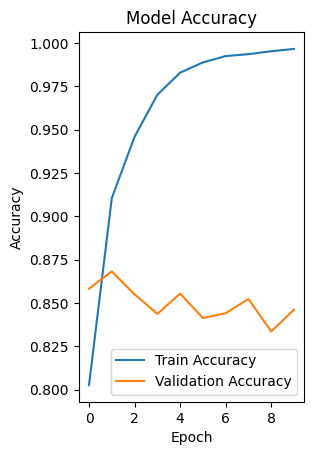

In [16]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [18]:

def predict_review(review):
    # Tokenize and pad the input review
    review_seq = tokenizer.texts_to_sequences([review])
    padded_review = pad_sequences(review_seq, maxlen=max_length, padding='post')

    # Predict the sentiment
    prediction = model.predict(padded_review)

    # Threshold to classify as positive (1) or negative (0)
    if prediction >= 0.5:
        print(f"Review: '{review}' is Positive with a confidence of {prediction[0][0]:.2f}")
    else:
        print(f"Review: '{review}' is Negative with a confidence of {1 - prediction[0][0]:.2f}")

In [20]:
new_review = input("Please enter a movie review for sentiment analysis: ")
predict_review(new_review)


Please enter a movie review for sentiment analysis: it was disapointing
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Review: 'it was disapointing' is Negative with a confidence of 0.96
